In [65]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models, layers
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import random
import warnings
warnings.filterwarnings("ignore")

In [21]:
# Image size
img_size = 128

# Updated folder paths (pointing to actual images)
benign_path = "/kaggle/input/bus-uc-breast-ultrasound/BUS_UC/BUS_UC/BUS_UC/Benign/images"
malignant_path = "/kaggle/input/bus-uc-breast-ultrasound/BUS_UC/BUS_UC/BUS_UC/Malignant/images"

# Initialize lists
benign_images, malignant_images = [], []
benign_labels, malignant_labels = [], []

# Load Benign images
for file in os.listdir(benign_path):
    img_path = os.path.join(benign_path, file)
    if file.lower().endswith((".jpg", ".jpeg", ".png")):
        try:
            img = load_img(img_path, target_size=(img_size, img_size))
            img = img_to_array(img) / 255.0
            benign_images.append(img)
            benign_labels.append(0)
        except Exception as e:
            print(f"Error loading benign image {file}: {e}")

# Load Malignant images
for file in os.listdir(malignant_path):
    img_path = os.path.join(malignant_path, file)
    if file.lower().endswith((".jpg", ".jpeg", ".png")):
        try:
            img = load_img(img_path, target_size=(img_size, img_size))
            img = img_to_array(img) / 255.0
            malignant_images.append(img)
            malignant_labels.append(1)
        except Exception as e:
            print(f"Error loading malignant image {file}: {e}")

# Combine the two
X = np.array(benign_images + malignant_images)
y = np.array(benign_labels + malignant_labels)

print("Total images:", len(X))
print("Benign:", len(benign_images), "| Malignant:", len(malignant_images))

Total images: 811
Benign: 358 | Malignant: 453


In [22]:
X = np.array(X)
y = np.array(y)
# One-hot encode labels
y = to_categorical(y, num_classes=2)
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Print shape summary
print(f"Train set: {X_train.shape}, Labels: {y_train.shape}")
print(f"Test set: {X_test.shape}, Labels: {y_test.shape}")

Train set: (648, 128, 128, 3), Labels: (648, 2)
Test set: (163, 128, 128, 3), Labels: (163, 2)


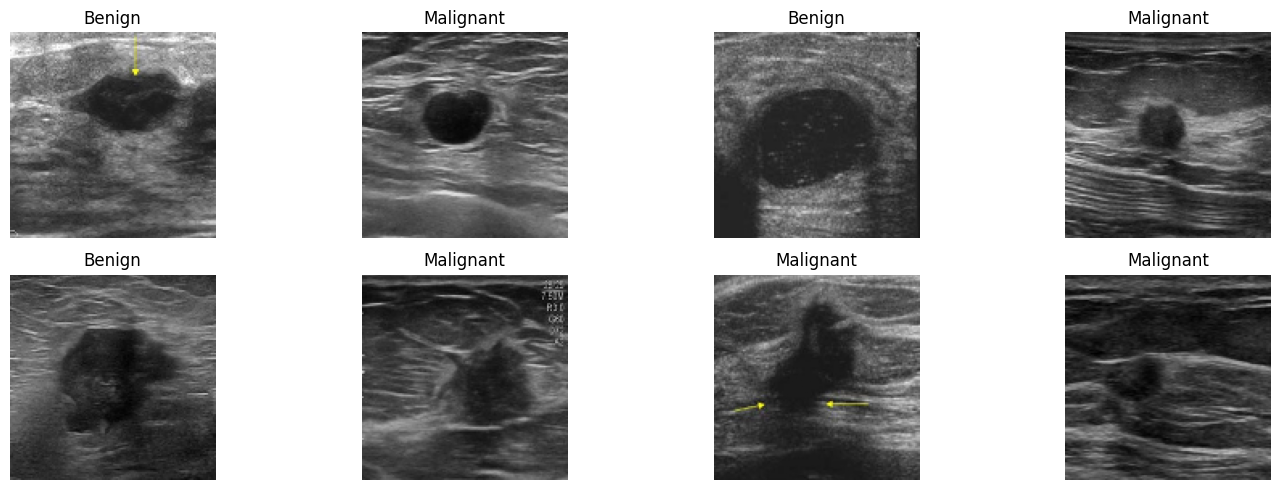

In [23]:
# Map one-hot encoded labels back to class names
label_map = {0: "Benign", 1: "Malignant"}
# Number of images to display
n = 8
plt.figure(figsize=(15, 5))
for i in range(n):
    idx = np.random.randint(0, len(X_train))
    image = X_train[idx]
    label = np.argmax(y_train[idx])  # Convert one-hot to class index   
    plt.subplot(2, n//2, i+1)
    plt.imshow(image)
    plt.title(label_map[label])
    plt.axis("off")
plt.tight_layout()
plt.show()

In [45]:
#Data augmentation
batch_size = 64 #Initiating  batch size for augmentation
data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(X_train, y_train, batch_size)

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization

In [59]:
INPUT_SHAPE = (128, 128, 3)
KERNEL_SIZE = (3, 3)
model = Sequential()#Initiating the model
# Convolutional Layer
model.add(Conv2D(filters=128, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
# Pooling layer
model.add(MaxPool2D(pool_size=(2, 2)))
# Dropout layers
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=128, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
# model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(layers.Dense(2, activation='softmax'))  # Output layer with softmax for 2 classes
# Model summary
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_38 (Conv2D)                   │ (None, 128, 128, 128)       │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_38               │ (None, 128, 128, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_39 (Conv2D)                   │ (None, 128, 128, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_39               │ (None, 128, 128, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_24 (MaxPooling2D)      │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_40 (Conv2D)                   │ (None, 64, 64, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_40               │ (None, 64, 64, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_41 (Conv2D)                   │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_41               │ (None, 64, 64, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_25 (MaxPooling2D)      │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_42 (Conv2D)                   │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_42               │ (None, 32, 32, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_43 (Conv2D)                   │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_43               │ (None, 32, 32, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_26 (MaxPooling2D)      │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 4,680,578 (17.85 MB)

 Trainable params: 4,679,298 (17.85 MB)

 Non-trainable params: 1,280 (5.00 KB)

In [60]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [61]:
# Fit the model with the augmented data
history = model.fit(train_generator,epochs = 50,validation_data=(X_test, y_test))

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.5206 - loss: 14.0506 - val_accuracy: 0.5644 - val_loss: 1.3566
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 144ms/step - accuracy: 0.5330 - loss: 1.3731 - val_accuracy: 0.4847 - val_loss: 0.7658
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 143ms/step - accuracy: 0.5238 - loss: 0.9760 - val_accuracy: 0.5706 - val_loss: 0.7079
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 147ms/step - accuracy: 0.5628 - loss: 0.8400 - val_accuracy: 0.4479 - val_loss: 0.7145
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 135ms/step - accuracy: 0.5285 - loss: 0.7158 - val_accuracy: 0.5583 - val_loss: 0.7607
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 145ms/step - accuracy: 0.5566 - loss: 0.6841 - val_accuracy: 0.5460 - val_loss: 0.8555
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 144ms/step - accuracy: 0.5554 - loss: 0.6806 - val_accuracy: 0.4540 - val_loss: 0.7036
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 164ms/step - accuracy: 0.5729 - loss: 0.6774 - val_accuracy: 0.5

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


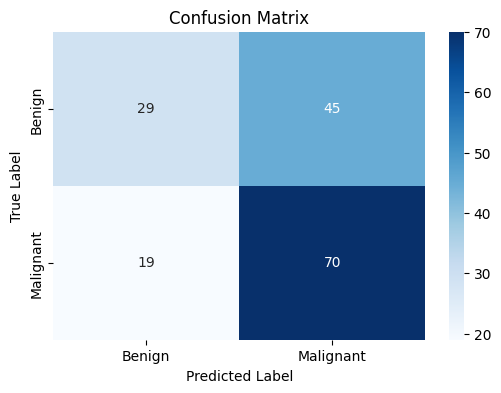

In [64]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
# Convert one-hot encoded y_test to integer labels
y_true = np.argmax(y_test, axis=1)
# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [66]:
# Classification report
report = classification_report(y_true, y_pred, target_names=['Benign', 'Malignant'])
print(report)

              precision    recall  f1-score   support

      Benign       0.60      0.39      0.48        74
   Malignant       0.61      0.79      0.69        89

    accuracy                           0.61       163
   macro avg       0.61      0.59      0.58       163
weighted avg       0.61      0.61      0.59       163

